## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None) 
labels = (labels=='positive').astype(np.int_)

In [106]:
#Pre-processing - join both dataframes
if len(reviews) != len(labels): 
    raise ValueError('Reviews and labels dont have the same number of rows')

merged_df = pd.concat([reviews.reset_index(drop=True), labels.reset_index(drop=True)], axis=1)
merged_df.columns = ['review', 'label']
print(merged_df)

                                                  review  label
0      bromwell high is a cartoon comedy . it ran at ...      1
1      story of a man who has unnatural feelings for ...      0
2      homelessness  or houselessness as george carli...      1
3      airport    starts as a brand new luxury    pla...      0
4      brilliant over  acting by lesley ann warren . ...      1
...                                                  ...    ...
24995  i saw  descent  last night at the stockholm fi...      0
24996  a christmas together actually came before my t...      1
24997  some films that you pick up for a pound turn o...      0
24998  working  class romantic drama from director ma...      1
24999  this is one of the dumbest films  i  ve ever s...      0

[25000 rows x 2 columns]


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(merged_df['review']).toarray()
y = np.array(merged_df['label'])
print(vectorizer.get_feature_names_out()[:10])

X_, X_test, y_, y_test = train_test_split(X, y, train_size=.8, random_state=504)
X_train, X_validate, y_train, y_validate = train_test_split(X_, y_, train_size=.75, random_state=504)

['aaron' 'abandon' 'abandoned' 'abc' 'abilities' 'ability' 'able' 'aboard'
 'abominable' 'abomination']


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [99]:
feature_names = vectorizer.get_feature_names_out()

word = "abomination" 
word_index = list(feature_names).index(word) if word in feature_names else None

if word_index is not None:
    print(f"Word '{word}' is in column {word_index}.")
    print(f"Counts for '{word}' in all reviews: {X[:, word_index]}")
else:
    print(f"Word '{word}' is not in the vocabulary.")


review_index = 0 
review_vector = X[review_index]

non_zero_indices = review_vector.nonzero()[0]

non_zero_words = [(feature_names[i], review_vector[i]) for i in non_zero_indices]

print(f"Review at index {review_index}:")
print("Words and their counts:", non_zero_words)

Word 'abomination' is in column 9.
Counts for 'abomination' in all reviews: [0 0 0 ... 0 0 0]
Review at index 0:
Words and their counts: [('about', 1), ('adults', 1), ('age', 1), ('all', 1), ('and', 1), ('as', 2), ('at', 2), ('believe', 1), ('burn', 1), ('can', 1), ('cartoon', 1), ('classic', 1), ('closer', 1), ('comedy', 1), ('down', 1), ('episode', 1), ('expect', 1), ('far', 1), ('fetched', 1), ('here', 1), ('high', 5), ('immediately', 1), ('in', 2), ('insightful', 1), ('inspector', 1), ('is', 4), ('isn', 1), ('it', 2), ('knew', 1), ('lead', 1), ('life', 1), ('line', 1), ('many', 1), ('me', 2), ('much', 1), ('my', 2), ('of', 4), ('one', 1), ('other', 1), ('pathetic', 1), ('pity', 1), ('profession', 1), ('programs', 1), ('ran', 1), ('reality', 1), ('remind', 1), ('repeatedly', 1), ('right', 1), ('sack', 1), ('same', 1), ('satire', 1), ('saw', 1), ('school', 2), ('schools', 1), ('see', 1), ('situation', 1), ('some', 1), ('student', 2), ('students', 2), ('such', 1), ('survive', 1), ('te

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [103]:
import tensorflow as tf
from tensorflow.keras import layers

ann = tf.keras.Sequential([
    layers.Dense(4, input_dim=10000, activation='swish'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

ann.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = ann.fit(X_train, y_train, epochs = 100, validation_data=(X_validate, y_validate), callbacks=[es])



Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8037 - loss: 0.4280 - val_accuracy: 0.8860 - val_loss: 0.2895
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1710 - val_accuracy: 0.8826 - val_loss: 0.3136
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.0933 - val_accuracy: 0.8700 - val_loss: 0.4048
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0618 - val_accuracy: 0.8648 - val_loss: 0.5332
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0586 - val_accuracy: 0.8628 - val_loss: 0.5376
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0439 - val_accuracy: 0.8632 - val_loss: 0.6879
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.8630 - val_loss: 0.7786
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0368 - val_accu

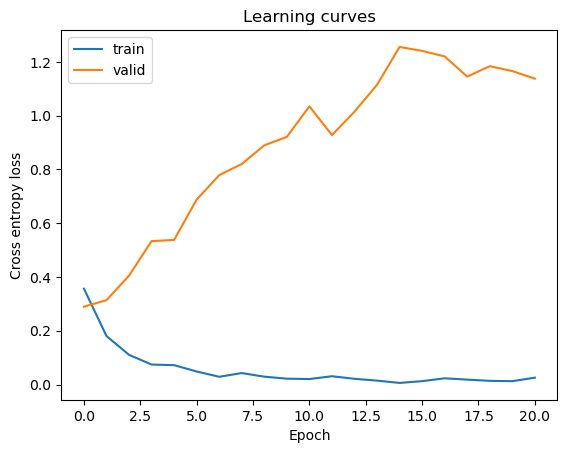

In [108]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

**(d)** Test your sentiment-classifier on the test set.

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred_proba = ann.predict(X_test)

y_pred = (y_pred_proba >= 0.5).astype(int)

# Print some of the predictions and true labels
print(f"Predictions: {y_pred[:10]}")
print(f"True Labels: {y_test[:10]}")

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.3101
Test Loss: 0.3022
Test Accuracy: 0.8836
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
Predictions: [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
True Labels: [1 0 0 0 1 0 0 0 0 0]


NameError: name 'sns' is not defined

<Figure size 600x500 with 0 Axes>

**(e)** Use the classifier to classify a few sentences you write yourselves. 